# Multi-view Projection Test

A simple demo is provided to render the multi-view mesh model to fit the image.  The description of the multi-view data can be found [here](https://github.com/zhuhao-nju/facescape_debug/blob/master/doc/doc_mview_model.md). Firstly, make sure the environment and sample data have been prepared following [README-toolkit](https://github.com/zhuhao-nju/facescape/blob/master/toolkit/README.md). Then run the demo:


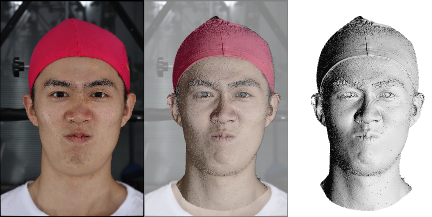

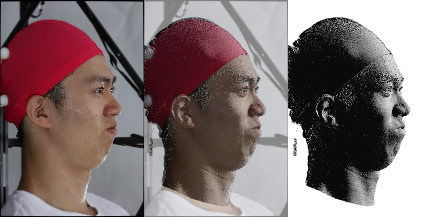

In [1]:
import sys, cv2, json
import numpy as np
import src.renderer as renderer
import src.utility as util

# test_num is the camera index
def projection_test(test_num, scale=1.0):

    # read params
    with open("../samples/sample_mview_data/4_anger/params.json", 'r') as f:
        params = json.load(f)

    # extract KRt dist
    K = np.array(params['%d_K' % test_num])
    Rt = np.array(params['%d_Rt' % test_num])
    dist = np.array(params['%d_distortion' % test_num], dtype = np.float)
    h_src = params['%d_height' % test_num]
    w_src = params['%d_width' % test_num]

    # scale h and w
    h, w = int(h_src * scale), int(w_src * scale)
    K[:2,:] = K[:2,:] * scale

    # read image
    src_img = cv2.imread("../samples/sample_mview_data/4_anger/%d.jpg" % test_num)
    src_img = cv2.resize(src_img, (w, h))

    # undistort image
    undist_img = cv2.undistort(src_img, K, dist)

    # read and render mesh
    mesh_dirname = "../samples/sample_mview_data/4_anger.ply"
    _, rend_img = renderer.render_cvcam(mesh_dirname, K, Rt, rend_size=(h, w))

    # project and show
    mix_img = cv2.addWeighted(rend_img, 0.5, undist_img, 0.5, 0)
    concat_img = np.concatenate((undist_img, mix_img, rend_img), axis = 1)
    
    return concat_img

util.show_img_arr(projection_test(49, 0.05), bgr_mode = True)
util.show_img_arr(projection_test(50, 0.05), bgr_mode = True)


right: source image; middle: rendered mesh on image; right: rendered mesh